In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
Train_df = pd.read_csv('./nslkdd/KDDTrain+.txt')

In [7]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

Train_df.columns = columns
Train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
Train_df['urgent'].value_counts()

urgent
0    125963
1         5
2         3
3         1
Name: count, dtype: int64

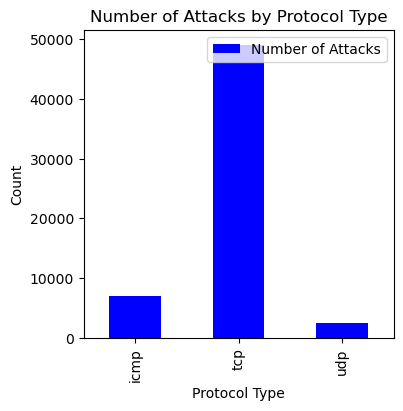

In [9]:
attack_counts = Train_df[Train_df['attack'] != 'normal'].groupby('protocol_type').count()['attack']


plt.figure(figsize=(4, 4))

# Plot number of attacks
attack_counts.plot(kind='bar', color='blue', label='Number of Attacks')

plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Number of Attacks by Protocol Type')
plt.legend()
plt.show()


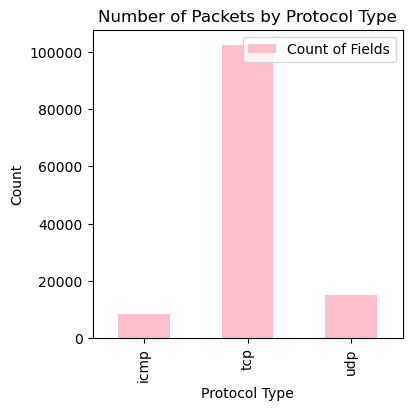

In [10]:
field_counts = Train_df.groupby('protocol_type').count()['attack']

# Plot count of fields
plt.figure(figsize=(4, 4))
field_counts.plot(kind='bar', color='pink', label='Count of Fields')

plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Number of Packets by Protocol Type')
plt.legend()
plt.show()

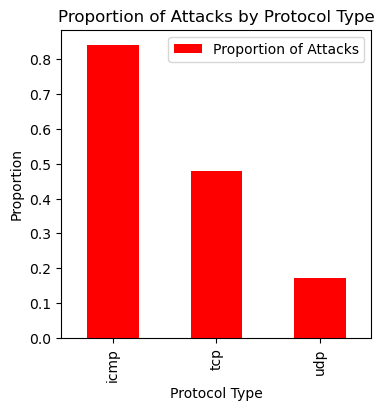

In [11]:
# Calculate the proportion of attacks by protocol type
attack_proportion = Train_df[Train_df['attack'] != 'normal'].groupby('protocol_type').count()['attack'] / Train_df.groupby('protocol_type').count()['attack']

plt.figure(figsize=(4, 4))

# Plot the proportion of attacks
attack_proportion.plot(kind='bar', color='red', label='Proportion of Attacks')

plt.xlabel('Protocol Type')
plt.ylabel('Proportion')
plt.title('Proportion of Attacks by Protocol Type')
plt.legend()
plt.show()


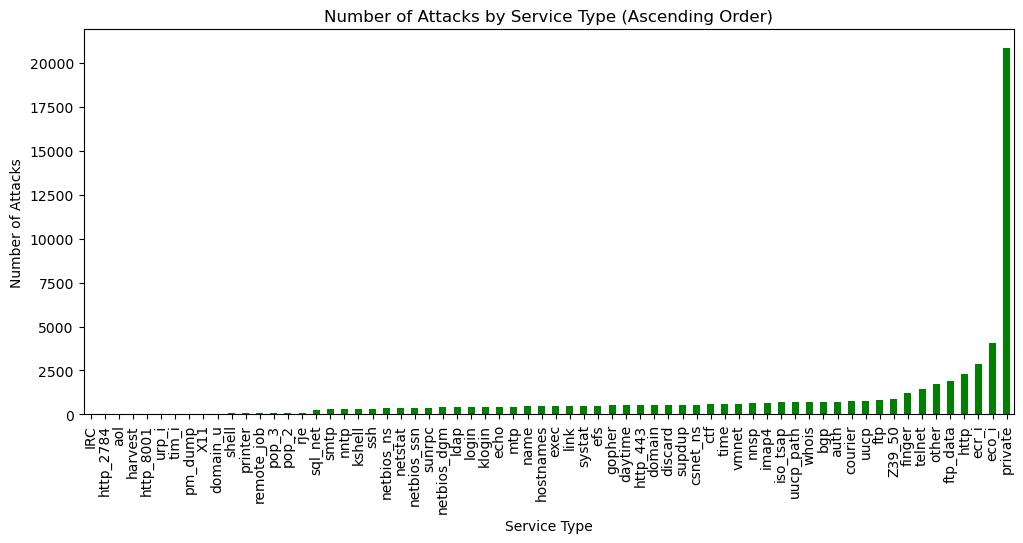

In [12]:
service_counts = Train_df[Train_df['attack'] != 'normal'].groupby('service').count()['attack']

# Sort the service_counts in ascending order
service_counts = service_counts.sort_values()

# Plot the bar plot
plt.figure(figsize=(12, 5))
service_counts.plot(kind='bar', color='green')

plt.xlabel('Service Type')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Service Type (Ascending Order)')
plt.show()


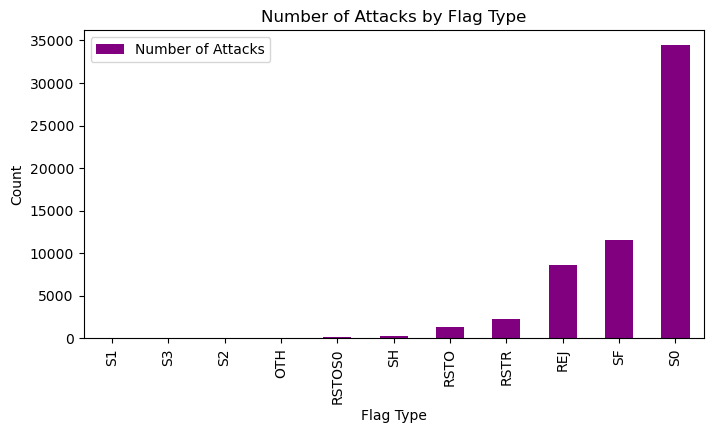

In [13]:
attack_counts = Train_df[Train_df['attack'] != 'normal'].groupby('flag').count()['attack']

plt.figure(figsize=(8, 4))

# Sort the attack_counts in ascending order
attack_counts = attack_counts.sort_values()

# Plot number of attacks with different flag types
attack_counts.plot(kind='bar', color='purple', label='Number of Attacks')

plt.xlabel('Flag Type')
plt.ylabel('Count')
plt.title('Number of Attacks by Flag Type')
plt.legend()
plt.show()

# This flag indicates that a TCP packet with no flags set was sent to probe for open ports. It's an attempt to see how a system responds without setting any TCP flags.

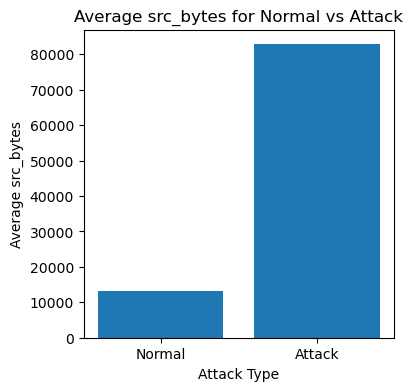

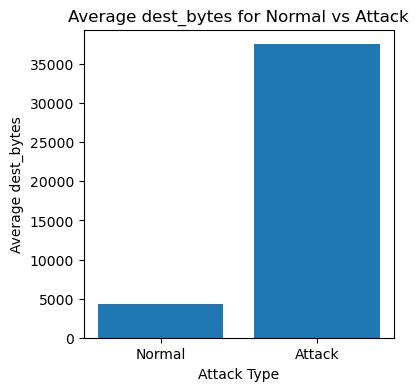

In [14]:

# Calculate the average src_bytes when attack is normal
normal_avg = Train_df[Train_df['attack'] == 'normal']['src_bytes'].mean()

# Calculate the average src_bytes when attack is not normal
attack_avg = Train_df[Train_df['attack'] != 'normal']['src_bytes'].mean()

# Create a bar plot to compare the averages
plt.figure(figsize=(4, 4))
plt.bar(['Normal', 'Attack'], [normal_avg, attack_avg])
plt.xlabel('Attack Type')
plt.ylabel('Average src_bytes')
plt.title('Average src_bytes for Normal vs Attack')

# Calculate the average dest_bytes when attack is normal
normal_dest_avg = Train_df[Train_df['attack'] == 'normal']['dst_bytes'].mean()

# Calculate the average dest_bytes when attack is not normal
attack_dest_avg = Train_df[Train_df['attack'] != 'normal']['dst_bytes'].mean()

# Create a bar plot to compare the averages
plt.figure(figsize=(4, 4))
plt.bar(['Normal', 'Attack'], [normal_dest_avg, attack_dest_avg])
plt.xlabel('Attack Type')
plt.ylabel('Average dest_bytes')
plt.title('Average dest_bytes for Normal vs Attack')
plt.show()

In [15]:
! pip install dash

In [16]:
#print columns of train_df
Train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

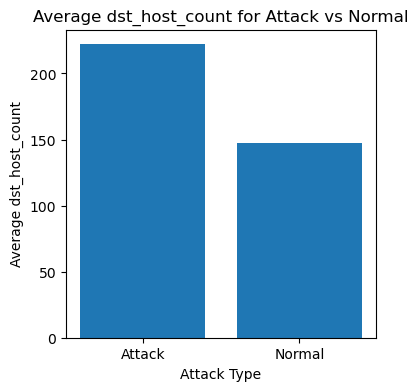

In [17]:
# Calculate the average dst_host_count when attack is not normal
attack_avg = Train_df[Train_df['attack'] != 'normal']['dst_host_count'].mean()

# Calculate the average dst_host_count when attack is normal
normal_avg = Train_df[Train_df['attack'] == 'normal']['dst_host_count'].mean()

# Create a bar plot to compare the averages
plt.figure(figsize=(4, 4))
plt.bar(['Attack', 'Normal'], [attack_avg, normal_avg])
plt.xlabel('Attack Type')
plt.ylabel('Average dst_host_count')
plt.title('Average dst_host_count for Attack vs Normal')
plt.show()
